I was previously using a janky custom plotting script for this so let's move to using GetDist

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from getdist.gaussian_mixtures import GaussianND
from getdist import plots

In [2]:
# Set some basic parameters
endfilename='status_check_April2024'

In [3]:
# Load the fisher matrices

Fisher_Eg = np.loadtxt('/home/danielle/Research/EG_comparison/txtfiles/Fisher_Eg_priors_'+endfilename+'.txt')
Fisher_jp = np.loadtxt('/home/danielle/Research/EG_comparison/txtfiles/Fisher_jp_priors_'+endfilename+'.txt')

We want to look at a bunch of different cases in terms of what is fixed vs varied:

In [4]:
# Fix everything except mu0 and Sigma0:
invfish_Eg_fix = np.linalg.inv(Fisher_Eg[0:2,0:2])
invfish_jp_fix = np.linalg.inv(Fisher_jp[0:2,0:2])

# Vary sigma8
invfish_jp_sig8 = np.linalg.inv(Fisher_jp[0:6,0:6])

# Vary the bias
invfish_jp_b = np.linalg.inv(np.delete(np.delete(Fisher_jp, [5,7], axis=0), [5,7], axis=1))

# Vary the bias and sigma8
invfish_jp_b_sig8 = np.linalg.inv(Fisher_jp[0:7,0:7])

# Vary everything
inv_fish_jp_varyall = np.linalg.inv(Fisher_jp)
                                

In [23]:
print(invfish_jp_fix)

[[0.00440437 0.00106356]
 [0.00106356 0.00077593]]


In [12]:
# values and labels for plotting:

fid_vals_list = [0.0,0.0]
# And the list of names
names = ["mu0", "sig0"]
# and labels
labels = [ r"\mu_0", r"\Sigma_0"]

In [13]:
Eg_fix = GaussianND(fid_vals_list, invfish_Eg_fix, labels = labels, names = names)
jp_fix = GaussianND(fid_vals_list, invfish_jp_fix, labels = labels, names = names)

In [20]:
settings = plots.GetDistPlotSettings()
settings.fontsize=20
settings.axes_fontsize = 20
settings.axes_labelsize=20
settings.line_styles=[('--','#FA8128'), ('-','#6495ED')]

((-2291.794925633125, 2291.794925633125),
 (-8037.137306578377, 8037.137306578377))

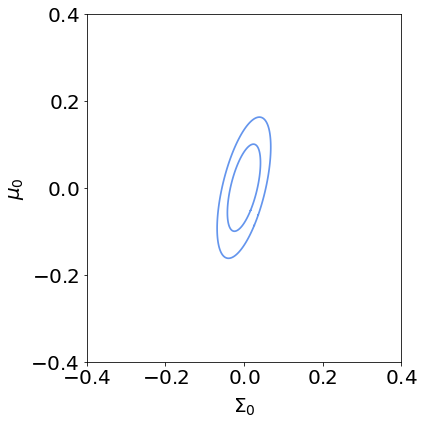

In [21]:
Fisher_plot = plots.get_subplot_plotter(width_inch=6, settings=settings)

Fisher_plot.plot_2d([Eg_fix, jp_fix], 'sig0', 'mu0', lims=[-0.4,0.4,-0.4,0.4])